### 필요 모듈 import

In [1]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Confusion Matrix Dispaly에 필요한 모듈
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

### 데이터 준비

In [2]:
# (2) 데이터 준비
digits = load_digits()
digits_data = digits.data
digits_label = digits.target

# 데이터 확인
print('shape: ', digits_data.shape)
print('keys: ', digits.keys())

# X data
print('feature names: ', digits.feature_names)
print('first data: ', digits_data[0])

# y data
print('target names: ', digits.target_names)
print('labels: ', digits_label)

shape:  (1797, 64)
keys:  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
feature names:  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
first data:  [ 0.  0.  5. 13.  9. 

### 학습(train), 평가(test) 데이터 분리

In [3]:
# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

### Machine Learning 모델 학습 및 예측

#### (1) Decision Tree

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

[[42  0  0  1  0  0  0  0  0  0]
 [ 0 34  3  1  0  1  1  0  0  2]
 [ 0  0 33  2  0  0  1  1  2  1]
 [ 0  1  0 31  0  0  0  0  1  1]
 [ 0  0  1  0 35  0  0  0  1  0]
 [ 0  1  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  2  0 26  0  0  0]
 [ 0  0  0

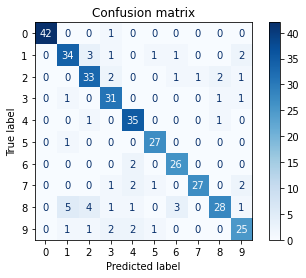

In [4]:
# (4) 모델 학습 및 예측
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = decision_tree
disp_labels = digits.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### (2) Random Forest

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

[[42  0  0  0  1  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  0  1]
 [ 0  0  0  0  1  0 27  0  0  0]
 [ 0  0  0

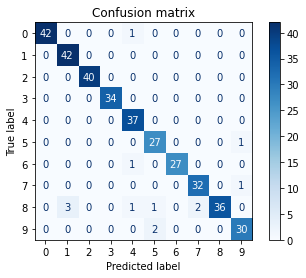

In [5]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = random_forest
disp_labels = digits.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### (3) Support Vector Machine (SVM)

from sklearn.svm import SVC  
model = SVC(kernel='linear', C=1e10).fit(X, y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0

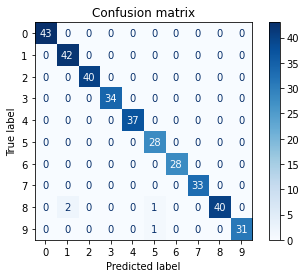

In [6]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = svm_model
disp_labels = digits.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### (4) Stochastic Gradient Descent Classifier (SGDClassifier)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.94      0.71      0.81        42
           2       1.00      1.00      1.00        40
           3       0.94      0.91      0.93        34
           4       0.92      0.97      0.95        37
           5       0.93      1.00      0.97        28
           6       0.96      0.89      0.93        28
           7       1.00      0.94      0.97        33
           8       0.71      0.93      0.81        43
           9       0.97      0.91      0.94        32

    accuracy                           0.93       360
   macro avg       0.94      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  2  0  0  0  0  9  1]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  3  0]
 [ 0  0  0  0 36  0  1  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0]
 [ 0  0  0  0  0  0 25  0  3  0]
 [ 0  0  0

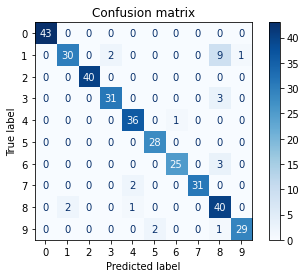

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = sgd_model
disp_labels = digits.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### (5) Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  1  1]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 27  0  0  1  0]
 [ 0  0  0  0  0  0 27  0  1  0]
 [ 0  0  0

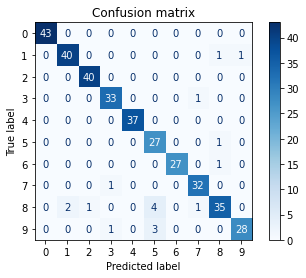

In [8]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=2500)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion Matrix 그리기

clf = logistic_model
disp_labels = digits.target_names

title = "Confusion matrix"
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, 
                                             display_labels=disp_labels, cmap=plt.cm.Blues)
disp.ax_.set_title(title)

print(confusion_matrix(y_test, y_pred))

#### 정확도 결과  
(1) Decision Tree : 86%  
(2) Random Forest: 96%  
(3) SVM: 99%  
(4) SGD Classifier: 94%  
(5) Logistics Regression: 95%  

#### 해석
- 손글씨 모양을 맞추는 문제이므로 적절한 척도로는 정확도(accuracy)를 들 수 있음  
- SVM(Support Vector Machine)이 제일 좋은 결과를 보임  
- SVM은 또한 0~9까지 모든 글자에 대해서도 제일 높은 정밀도(precision), 재현율(recall) 값을 보임 
